In [ ]:
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zensus_und_wahlergebnis_darmstadt.csv')

In [3]:
df.columns

Index(['WAHLBEZIRK', 'Insgesamt_Bevoelkerung_x', 'Unter10', 'a10bis19',
       'a20bis29', 'a30bis39', 'a40bis49', 'a50bis59', 'a60bis69', 'a70bis79',
       'a80undaelter', '1_Person', '2_Personen', '3_Personen', '4_Personen',
       '5_Personen', '6_Personen_und_mehr', 'Anzahl_Auslaender',
       'Anzahl_FlaechejeBew', 'Gesamtalter', 'AnzahlWohnungen', 'HHGroesse',
       'Miete', 'Anzahl_Eigentuemer', 'Leerstand', 'Anteil_Auslaender',
       'FlaechejeBew', 'Durchschnittsalter', 'Mean_HHGroesse',
       'Durchschnittsmiete_qm', 'Anteil_Eigentuemer', 'Leerstandsquote',
       'gebiet-nr', 'Insgesamt', 'SPD', 'CDU', 'Grüne', 'FDP', 'AfD', 'Linke',
       'Anteil_SPD', 'Anteil_CDU', 'Anteil_Grüne', 'Anteil_FDP', 'Anteil_AfD',
       'Anteil_Linke'],
      dtype='object')

Definiere die relevanten columns und die Farbe pro Partei

In [ ]:
cls_parteien = ['Anteil_SPD', 'Anteil_CDU', 'Anteil_Grüne', 'Anteil_FDP', 'Anteil_AfD', 'Anteil_Linke']
cls_zensus = ['Anteil_Auslaender','FlaechejeBew', 'Durchschnittsalter', 'Mean_HHGroesse', 'Durchschnittsmiete_qm', 'Anteil_Eigentuemer']
palette = {'SPD': '#f44647', 
           'CDU': 'black', 
           'Grüne': '#46962b', 
           'FDP': '#ffd600', 
           'AfD': '#8b4513', 
           'Linke': '#c72767'}


Mach den Datensatz "lang". So dass wir nur noch die Spalten Wahlbezirk, Merkmal, Wert des Merkmals, Partei, Parteiergebnis haben. Damit können einige Plot-Bibliotheken besser umgehen

In [5]:
dflong = pd.melt(df, id_vars=['WAHLBEZIRK'] + cls_parteien, value_vars=cls_zensus, var_name='Merkmal_zensus', value_name='Wert')
dflong = pd.melt(dflong, id_vars=['WAHLBEZIRK', 'Merkmal_zensus', 'Wert'], value_vars=cls_parteien, var_name='Partei', value_name='Ergebnis')
dflong['Partei'] = dflong.Partei.apply(lambda x: x.replace("Anteil_", ""))
dflong['Ergebnis'] = dflong.Ergebnis * 100.0

Definiere Funktionen, um die Korrelation zu bestimmen. Beides geklaut von stackoverflow

In [6]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Wert'], data['Ergebnis'],)
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}'.format(r),
            transform=ax.transAxes)

In [7]:
def annotate_pair(x,y, **kws):
    r, p = sp.stats.pearsonr(x,y)
    ax = plt.gca()
    ax.text(.35, .9, 'r={:.2f}'.format(r),
            transform=ax.transAxes, backgroundcolor = (0.0, 0.0, 1.0, 0.2))

Wähle nun für `zensus_merkmal` einen Wert aus `cls_zensus`.

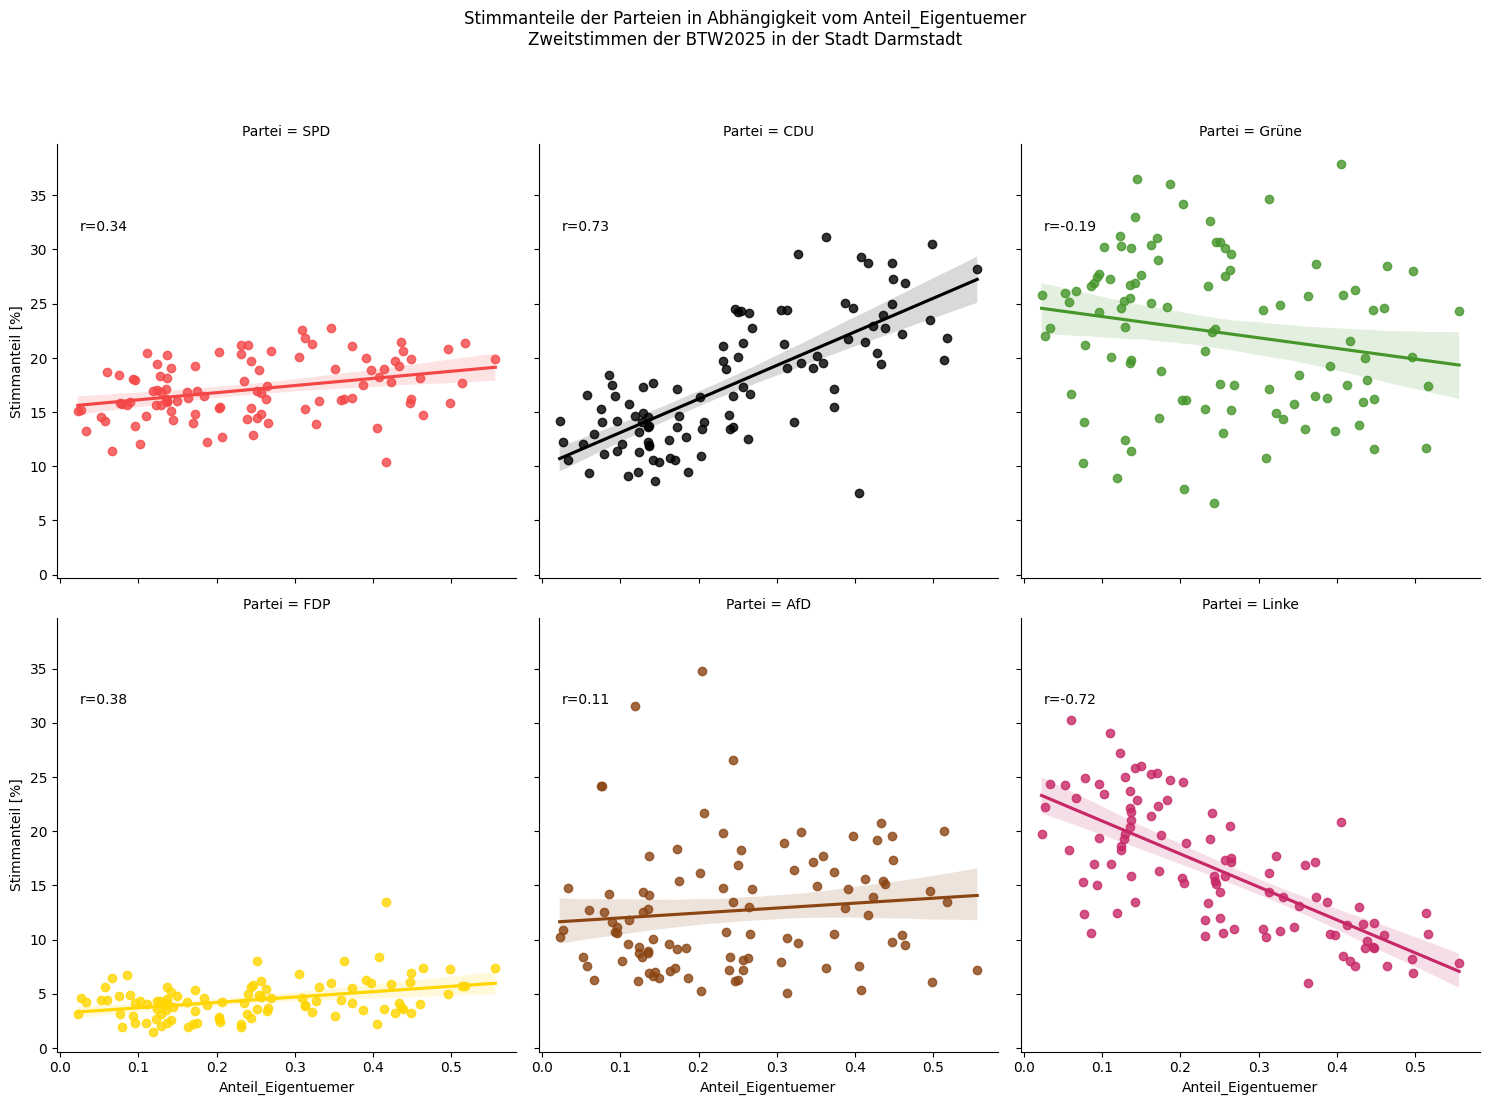

In [8]:
zensus_merkmal = 'Anteil_Eigentuemer'
g = sns.lmplot(dflong.query("Merkmal_zensus == @zensus_merkmal"), x='Wert', y = 'Ergebnis', col = 'Partei', hue = 'Partei', palette=palette, col_wrap=3)
g.map_dataframe(annotate)
g.figure.suptitle(f"Stimmanteile der Parteien in Abhängigkeit vom {zensus_merkmal}\nZweitstimmen der BTW2025 in der Stadt Darmstadt", y=1.1)
g.set_xlabels(zensus_merkmal)
g.set_ylabels("Stimmanteil [%]")

Plotte die Korrelation zwischen ausgewählten Zensusmerkmalen

C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_18628\631856020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teil3_merkmale['Anteil_Auslaender'] = teil3_merkmale['Anteil_Auslaender'] * 100.0


Text(0.5, 0.98, 'Korrelation der Zensusmerkmale\npro darmstädter Wahlbezirk')

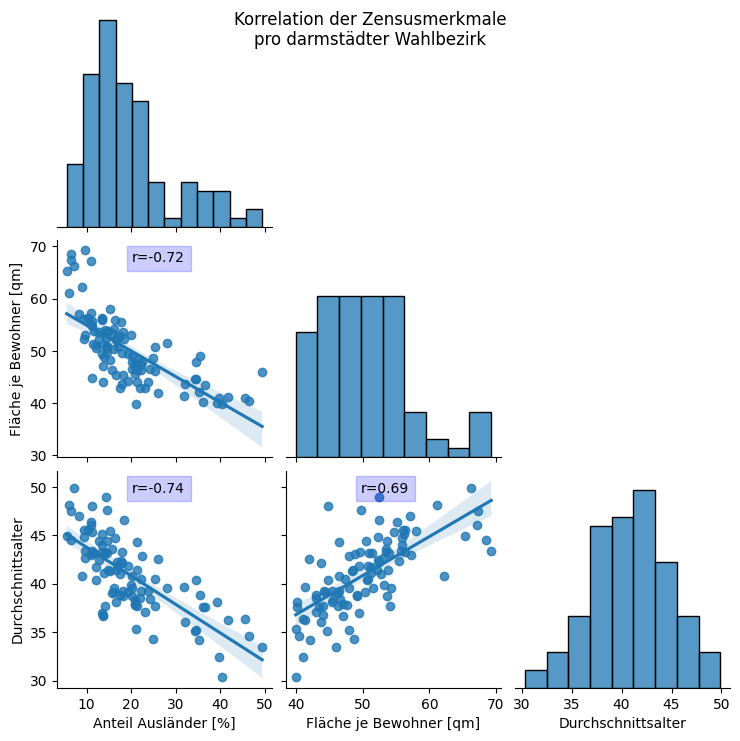

In [9]:
teil3_merkmale = df[['Anteil_Auslaender', 'FlaechejeBew', 'Durchschnittsalter']]
teil3_merkmale['Anteil_Auslaender'] = teil3_merkmale['Anteil_Auslaender'] * 100.0
teil3_merkmale.columns = ['Anteil Ausländer [%]', 'Fläche je Bewohner [qm]', 'Durchschnittsalter']
g = sns.pairplot(teil3_merkmale, kind = 'reg', corner = True)
g.map_lower(annotate_pair)
g.figure.suptitle("Korrelation der Zensusmerkmale\npro darmstädter Wahlbezirk")


## Das hier nochmal überarbeiten

In [4]:
cls = ['Anteil_SPD', 'Anteil_CDU', 'Anteil_Grüne', 'Anteil_FDP', 'Anteil_AfD', 'Anteil_Linke']
dfp = df[cls]

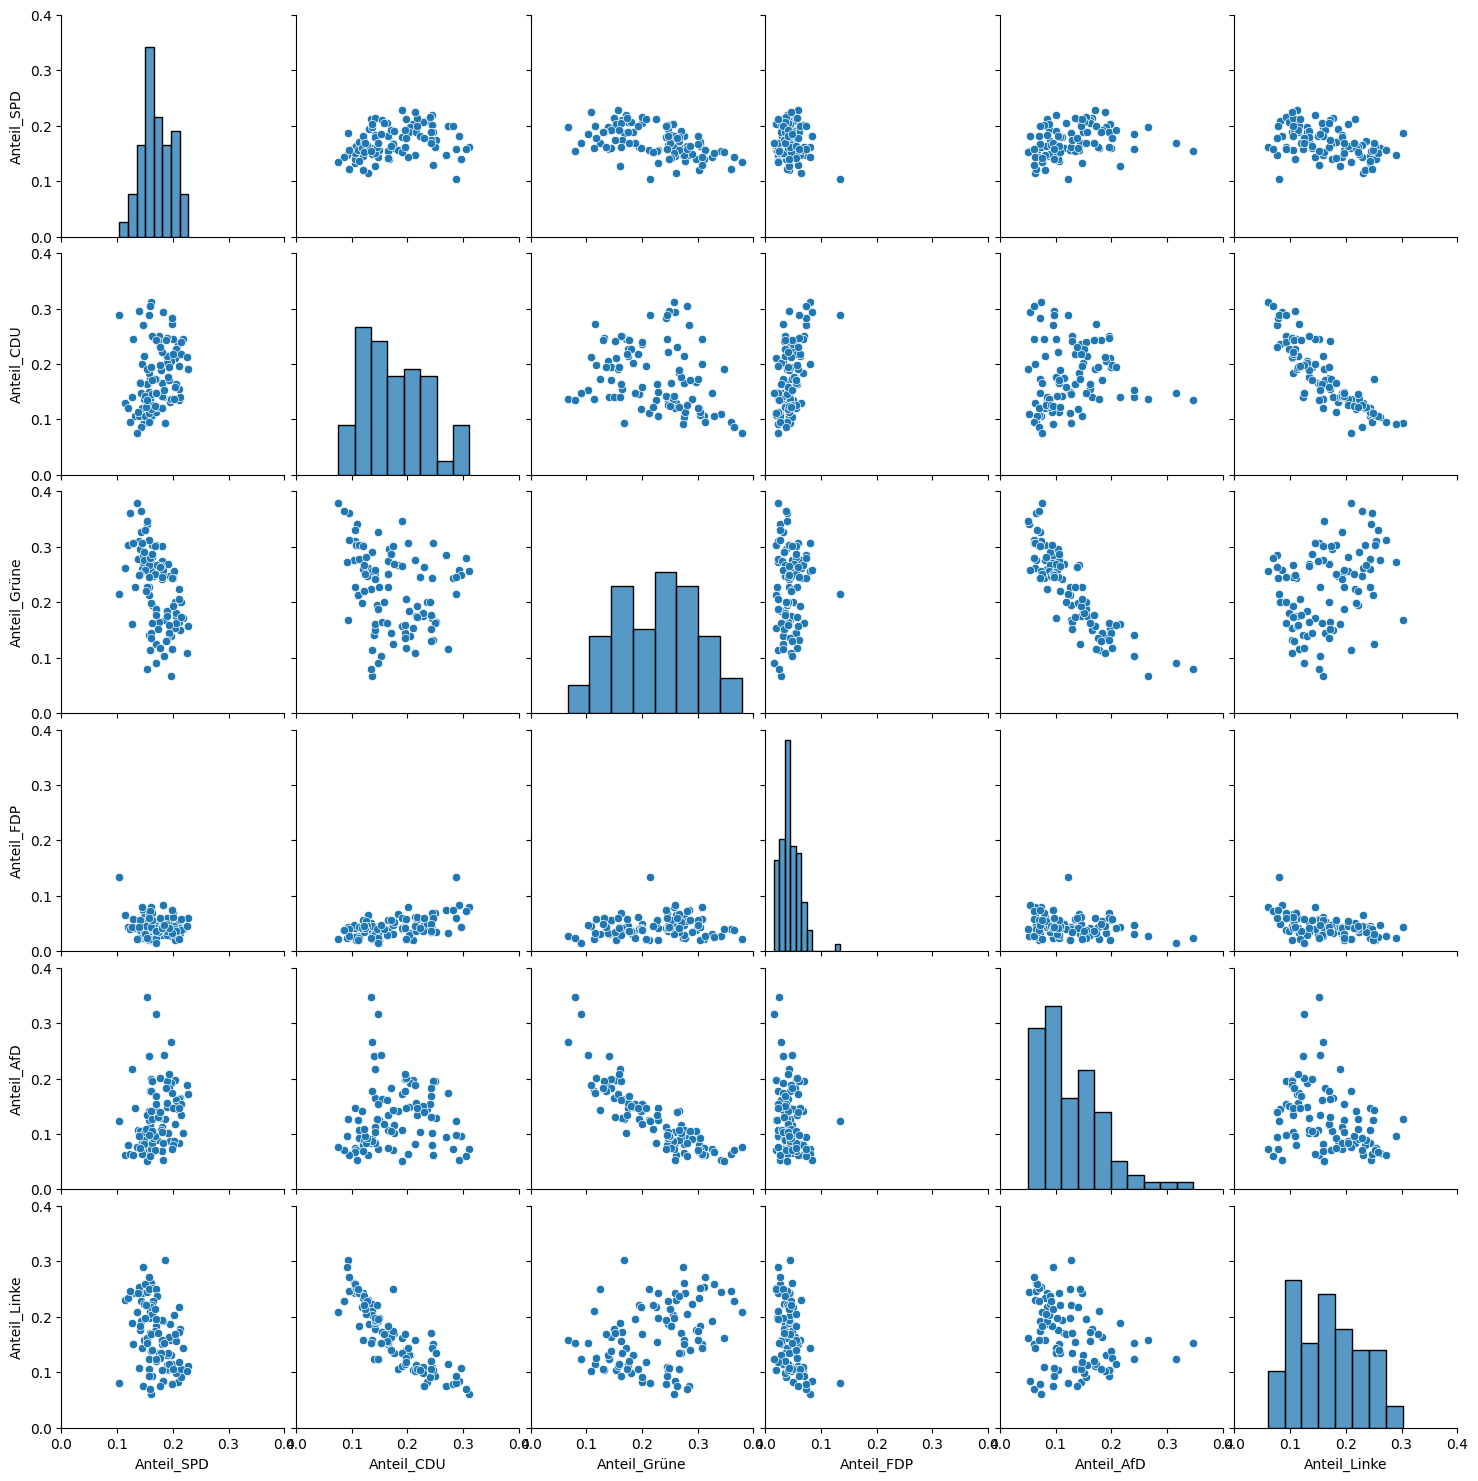

In [24]:
fig = sns.pairplot(dfp)
# fig.set_axis_labels("Flipper length (mm)", "Bill length (mm)")
# fig.set(title='Anteile der Parteien')
fig.set(xlim=(0, .4), ylim=(0, .4))